In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets

In [2]:
# Training dataset

car_train = pd.read_excel('cars_train.xlsx')
print(car_train.shape)
print('*'*75)
car_train.head(2)

(162, 26)
***************************************************************************


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0


In [3]:
# Testing dataset

car_test = pd.read_excel('cars_test.xlsx')
print(car_test.shape)
print('*'*75)
car_test.head(2)

(52, 26)
***************************************************************************


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,NaN
1,2,164.0,audi,gas,std,four,sedan,4wd,NaN,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,NaN


# EDA

In [4]:
# Checking missing values for training dataset

car_train.isna().sum()

symboling             0
normalized.losses    30
make                  0
fuel.type             0
aspiration            0
num.of.doors         11
body.style            0
drive.wheels          0
engine.location       2
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      2
engine.size           0
fuel.system           0
bore                  3
stroke                3
compression.ratio     0
horsepower            4
peak.rpm              4
city.mpg              0
highway.mpg           0
Car_Price             3
dtype: int64

In [5]:
# Checking missing values for testing dataset

car_test.isna().sum()

symboling             0
normalized.losses    12
make                  0
fuel.type             0
aspiration            0
num.of.doors          5
body.style            0
drive.wheels          0
engine.location       4
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      1
engine.size           0
fuel.system           0
bore                  1
stroke                1
compression.ratio     0
horsepower            0
peak.rpm              0
city.mpg              0
highway.mpg           0
Car_Price            52
dtype: int64

In [6]:
# filling in missing value for training data

car_train = car_train.fillna(method='ffill')
car_train.isna().sum()

symboling            0
normalized.losses    0
make                 0
fuel.type            0
aspiration           0
num.of.doors         0
body.style           0
drive.wheels         0
engine.location      0
wheel.base           0
length               0
width                0
height               0
curb.weight          0
engine.type          0
num.of.cylinders     0
engine.size          0
fuel.system          0
bore                 0
stroke               0
compression.ratio    0
horsepower           0
peak.rpm             0
city.mpg             0
highway.mpg          0
Car_Price            0
dtype: int64

In [7]:
# filling missing value for testing data expect price

car_test = car_test.fillna(method='bfill')
car_test.isna().sum()

symboling             0
normalized.losses     0
make                  0
fuel.type             0
aspiration            0
num.of.doors          0
body.style            0
drive.wheels          0
engine.location       0
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      0
engine.size           0
fuel.system           0
bore                  0
stroke                0
compression.ratio     0
horsepower            0
peak.rpm              0
city.mpg              0
highway.mpg           0
Car_Price            52
dtype: int64

In [8]:
car_test.head(2)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,3,164.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,NaN
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,NaN


C:\Users\manthan mankar\AppData\Local\Temp\ipykernel_2916\2850688361.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_train['Car_Price'])


<Axes: xlabel='Car_Price', ylabel='Density'>

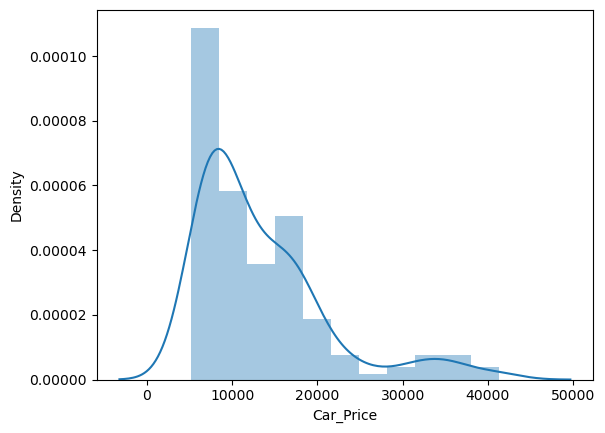

In [9]:
# hist plot

sns.distplot(car_train['Car_Price'])

In [10]:
# info
car_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          162 non-null    int64  
 1   normalized.losses  162 non-null    float64
 2   make               162 non-null    object 
 3   fuel.type          162 non-null    object 
 4   aspiration         162 non-null    object 
 5   num.of.doors       162 non-null    object 
 6   body.style         162 non-null    object 
 7   drive.wheels       162 non-null    object 
 8   engine.location    162 non-null    object 
 9   wheel.base         162 non-null    float64
 10  length             162 non-null    float64
 11  width              162 non-null    float64
 12  height             162 non-null    float64
 13  curb.weight        162 non-null    int64  
 14  engine.type        162 non-null    object 
 15  num.of.cylinders   162 non-null    object 
 16  engine.size        162 non

In [11]:
# info
car_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          52 non-null     int64  
 1   normalized.losses  52 non-null     float64
 2   make               52 non-null     object 
 3   fuel.type          52 non-null     object 
 4   aspiration         52 non-null     object 
 5   num.of.doors       52 non-null     object 
 6   body.style         52 non-null     object 
 7   drive.wheels       52 non-null     object 
 8   engine.location    52 non-null     object 
 9   wheel.base         52 non-null     float64
 10  length             52 non-null     float64
 11  width              52 non-null     float64
 12  height             52 non-null     float64
 13  curb.weight        52 non-null     int64  
 14  engine.type        52 non-null     object 
 15  num.of.cylinders   52 non-null     object 
 16  engine.size        52 non-nu

In [12]:
# Label Encoding for training dataset

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car_train['make'] = le.fit_transform(car_train['make'])
car_train['fuel.type'] = le.fit_transform(car_train['fuel.type'])
car_train['aspiration'] = le.fit_transform(car_train['aspiration'])
car_train['num.of.doors'] = le.fit_transform(car_train['num.of.doors'])
car_train['body.style'] = le.fit_transform(car_train['body.style'])
car_train['drive.wheels'] = le.fit_transform(car_train['drive.wheels'])
car_train['engine.location'] = le.fit_transform(car_train['engine.location'])
car_train['engine.type'] = le.fit_transform(car_train['engine.type'])
car_train['num.of.cylinders'] = le.fit_transform(car_train['num.of.cylinders'])
car_train['fuel.system'] = le.fit_transform(car_train['fuel.system'])
car_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          162 non-null    int64  
 1   normalized.losses  162 non-null    float64
 2   make               162 non-null    int32  
 3   fuel.type          162 non-null    int32  
 4   aspiration         162 non-null    int32  
 5   num.of.doors       162 non-null    int32  
 6   body.style         162 non-null    int32  
 7   drive.wheels       162 non-null    int32  
 8   engine.location    162 non-null    int32  
 9   wheel.base         162 non-null    float64
 10  length             162 non-null    float64
 11  width              162 non-null    float64
 12  height             162 non-null    float64
 13  curb.weight        162 non-null    int64  
 14  engine.type        162 non-null    int32  
 15  num.of.cylinders   162 non-null    int32  
 16  engine.size        162 non

In [13]:
# Label Encoding for testing dataset

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car_test['make'] = le.fit_transform(car_test['make'])
car_test['fuel.type'] = le.fit_transform(car_test['fuel.type'])
car_test['aspiration'] = le.fit_transform(car_test['aspiration'])
car_test['num.of.doors'] = le.fit_transform(car_test['num.of.doors'])
car_test['body.style'] = le.fit_transform(car_test['body.style'])
car_test['drive.wheels'] = le.fit_transform(car_test['drive.wheels'])
car_test['engine.location'] = le.fit_transform(car_test['engine.location'])
car_test['engine.type'] = le.fit_transform(car_test['engine.type'])
car_test['num.of.cylinders'] = le.fit_transform(car_test['num.of.cylinders'])
car_test['fuel.system'] = le.fit_transform(car_test['fuel.system'])
car_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          52 non-null     int64  
 1   normalized.losses  52 non-null     float64
 2   make               52 non-null     int32  
 3   fuel.type          52 non-null     int32  
 4   aspiration         52 non-null     int32  
 5   num.of.doors       52 non-null     int32  
 6   body.style         52 non-null     int32  
 7   drive.wheels       52 non-null     int32  
 8   engine.location    52 non-null     int32  
 9   wheel.base         52 non-null     float64
 10  length             52 non-null     float64
 11  width              52 non-null     float64
 12  height             52 non-null     float64
 13  curb.weight        52 non-null     int64  
 14  engine.type        52 non-null     int32  
 15  num.of.cylinders   52 non-null     int32  
 16  engine.size        52 non-nu

In [14]:
# Describe

car_train.describe()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.907407,122.728395,11.790123,0.913580,0.154321,0.469136,2.555556,1.351852,0.012346,98.354321,...,128.160494,3.271605,3.339877,3.243086,10.008704,105.987654,5113.888889,25.123457,30.679012,13267.104938
std,1.298855,34.949302,5.654034,0.281854,0.362376,0.500594,0.841472,0.562517,0.110766,6.049384,...,41.684844,2.027833,0.273098,0.354144,3.735804,41.198653,507.834582,6.604878,6.879309,7699.474175
min,-2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,8.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,98.000000,1.000000,3.150000,3.080000,8.700000,73.000000,4800.000000,19.000000,25.000000,7604.500000
50%,1.000000,119.000000,11.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,96.500000,...,120.000000,5.000000,3.340000,3.280000,9.000000,95.000000,5100.000000,24.000000,30.000000,10921.500000
75%,2.000000,150.000000,17.750000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,101.200000,...,146.000000,5.000000,3.600000,3.460000,9.400000,121.000000,5500.000000,30.000000,34.000000,16678.750000
max,3.000000,256.000000,20.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000


In [15]:
# Describe

car_test.describe()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,0.0
mean,0.711538,119.980769,9.076923,0.884615,0.250000,0.326923,2.788462,1.211538,0.0,99.638462,...,123.769231,2.134615,3.315769,3.276346,10.309808,100.461538,5129.807692,25.153846,30.519231,NaN
std,1.108550,34.496087,5.437149,0.322603,0.437237,0.473665,0.870802,0.571772,0.0,6.053622,...,40.006184,1.029541,0.260161,0.235988,4.405716,33.175979,413.883996,6.120953,6.661244,NaN
min,-1.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,88.600000,...,80.000000,0.000000,2.970000,2.640000,7.000000,56.000000,4150.000000,14.000000,16.000000,NaN
25%,0.000000,93.750000,3.750000,1.000000,0.000000,0.000000,2.000000,1.000000,0.0,95.600000,...,97.000000,1.000000,3.110000,3.150000,8.500000,69.750000,4800.000000,20.500000,25.000000,NaN
50%,1.000000,118.000000,9.500000,1.000000,0.000000,0.000000,3.000000,1.000000,0.0,97.850000,...,110.000000,2.500000,3.270000,3.350000,9.000000,96.000000,5200.000000,24.000000,30.000000,NaN
75%,1.000000,148.500000,15.000000,1.000000,0.250000,1.000000,3.000000,2.000000,0.0,102.850000,...,136.000000,3.000000,3.510000,3.400000,9.400000,114.250000,5500.000000,30.000000,34.000000,NaN
max,3.000000,231.000000,17.000000,1.000000,1.000000,1.000000,4.000000,2.000000,0.0,115.600000,...,304.000000,4.000000,3.800000,3.860000,23.000000,184.000000,6000.000000,38.000000,47.000000,NaN


# Split the data into X and y to perform linear regression to fill in the missing Car_Price data into car_test dataset

In [17]:
# Split the data into X (features) and y (target)
X_train = car_train.drop("Car_Price", axis=1)
y_train = car_train["Car_Price"]
X_test = car_test.drop("Car_Price", axis=1)
y_test = car_test["Car_Price"]

In [19]:
from sklearn.linear_model import LinearRegression

# Load and preprocess the "car_train" dataset (as shown in the previous response)

# Train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing prices in the "car_test" dataset
X_missing = car_test.drop("Car_Price", axis=1)
imputed_prices = model.predict(X_missing)

# Fill the missing values in the "car_test" dataset with the imputed prices
car_test["Car_Price"] = imputed_prices

In [21]:
car_test.describe()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.711538,119.980769,9.076923,0.884615,0.250000,0.326923,2.788462,1.211538,0.0,99.638462,...,123.769231,2.134615,3.315769,3.276346,10.309808,100.461538,5129.807692,25.153846,30.519231,13096.667170
std,1.108550,34.496087,5.437149,0.322603,0.437237,0.473665,0.870802,0.571772,0.0,6.053622,...,40.006184,1.029541,0.260161,0.235988,4.405716,33.175979,413.883996,6.120953,6.661244,6628.480486
min,-1.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,88.600000,...,80.000000,0.000000,2.970000,2.640000,7.000000,56.000000,4150.000000,14.000000,16.000000,5168.643274
25%,0.000000,93.750000,3.750000,1.000000,0.000000,0.000000,2.000000,1.000000,0.0,95.600000,...,97.000000,1.000000,3.110000,3.150000,8.500000,69.750000,4800.000000,20.500000,25.000000,8729.531328
50%,1.000000,118.000000,9.500000,1.000000,0.000000,0.000000,3.000000,1.000000,0.0,97.850000,...,110.000000,2.500000,3.270000,3.350000,9.000000,96.000000,5200.000000,24.000000,30.000000,11676.835618
75%,1.000000,148.500000,15.000000,1.000000,0.250000,1.000000,3.000000,2.000000,0.0,102.850000,...,136.000000,3.000000,3.510000,3.400000,9.400000,114.250000,5500.000000,30.000000,34.000000,16432.340542
max,3.000000,231.000000,17.000000,1.000000,1.000000,1.000000,4.000000,2.000000,0.0,115.600000,...,304.000000,4.000000,3.800000,3.860000,23.000000,184.000000,6000.000000,38.000000,47.000000,37535.385933


In [22]:
car_test.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,3,164.0,0,1,0,1,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,16975.021035
1,2,164.0,1,1,0,0,3,0,0,99.4,...,136,3,3.19,3.40,8.0,115,5500,18,22,13367.732346
2,2,158.0,1,1,0,1,3,1,0,99.8,...,136,3,3.19,3.40,8.5,110,5500,19,25,14191.850776
3,1,158.0,1,1,0,0,4,1,0,105.8,...,136,3,3.19,3.40,8.5,110,5500,19,25,16872.991964
4,1,158.0,1,1,1,0,3,1,0,105.8,...,131,3,3.13,3.40,8.3,140,5500,17,20,18802.152940


In [23]:
car_train.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,8,1,0,1,2,1,0,98.8,...,122,1,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,10,1,0,0,3,1,0,96.3,...,122,1,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,8,1,0,1,2,2,0,95.3,...,70,2,3.35,3.46,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,11,1,0,1,2,2,0,91.3,...,181,5,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,5,1,0,0,3,1,0,96.5,...,110,5,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


# Split the data again after filling all missing values into X(features) and y(target)

In [27]:
# Split the data into X (features) and y (target)
X_train = car_train.drop("Car_Price", axis=1)
y_train = car_train["Car_Price"]
X_test = car_test.drop("Car_Price", axis=1)
y_test = car_test["Car_Price"]

In [29]:
y_test

0     16975.021035
1     13367.732346
2     14191.850776
3     16872.991964
4     18802.152940
5     14624.527088
6     29691.835923
7      7659.444132
8      8262.361240
9     10713.065984
10     7180.112687
11     9519.278637
12    13528.045647
13    11533.308488
14     6991.087779
15     6899.659785
16    10603.605853
17    12275.821854
18    11972.790653
19    11972.790653
20    25235.917941
21    30389.449137
22    37535.385933
23    19236.649159
24    15119.849976
25    11314.320278
26     7497.957421
27     7899.345111
28    10552.428383
29    19623.033937
30    19471.814157
31    16330.315357
32     5863.935699
33     5168.643274
34    11820.362749
35    13304.161973
36     7806.211242
37     8885.254690
38     6191.342508
39     5372.477739
40     9734.181561
41     6409.171128
42    13130.170493
43    11877.301578
44     9024.152677
45     9335.029755
46     9285.095857
47    10804.630151
48     9761.541070
49    16738.416098
50    17496.807584
51    19173.852779
Name: Car_Pr

# Testing out Various Models

# 1. Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

print('*'*75)
print('\n Training Phase')
lin_reg.fit(X_train,y_train)
print()
print('HyperParameters:\n',lin_reg.get_params())
print()
print('Training completed\n')
print('*'*75)
print()
print('Testing Phase:')
ypred_lin_reg = lin_reg.predict(X_test)
print()
print('Predicted value is:\n',ypred_lin_reg)
print()
print('Testing completed')
print('*'*75)

#import Metrics
from sklearn.metrics import r2_score,mean_squared_error
print()
print('*'*75)
print('Linear Regression - Performance Measuer')
print('*'*75)

Accuracy_lin_reg = r2_score(y_test,ypred_lin_reg)
Mean_lin_reg = mean_squared_error(y_test,ypred_lin_reg)
SqrtMean_lin_reg = np.sqrt(mean_squared_error(y_test,ypred_lin_reg))

print('Accuracy Score:\t\n',Accuracy_lin_reg)
print('MSE:\t\n',Mean_lin_reg)
print('RMSE:\t\n',SqrtMean_lin_reg)


***************************************************************************

 Training Phase

HyperParameters:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Training completed

***************************************************************************

Testing Phase:

Predicted value is:
 [16975.02103515 13367.73234642 14191.85077618 16872.99196444
 18802.15293992 14624.52708776 29691.8359225   7659.44413154
  8262.36124031 10713.06598442  7180.11268654  9519.27863739
 13528.0456468  11533.30848761  6991.08777924  6899.65978508
 10603.60585295 12275.8218538  11972.79065315 11972.79065315
 25235.91794069 30389.44913666 37535.38593309 19236.64915869
 15119.84997605 11314.3202783   7497.95742062  7899.3451105
 10552.42838313 19623.03393673 19471.81415672 16330.31535704
  5863.93569912  5168.64327366 11820.36274927 13304.16197289
  7806.21124174  8885.25469022  6191.34250775  5372.47773895
  9734.18156052  6409.1711283  13130.17049321 11877.30157823
  9024.1

# 2. KNN Model

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn_model = KNeighborsRegressor(n_neighbors=3)
print('*'*28 + 'KNN Regression Model' + '*'*27)
print()
print('Training phasis\n')
knn_model.fit(X_train,y_train)
print('Training completed\n')
print('='*75)
print('Testing phase\n')
print()
ypred_knn = knn_model.predict(X_test)
print('Predicted values are :\t\n',ypred_knn)
print('Testing Completed')
print('='*75)

#Performace Measure

Accuracy_KNN = r2_score(y_test,ypred_knn)
Mean_KNN = mean_squared_error(y_test,ypred_knn)
SqrtMean_KNN = np.sqrt(mean_squared_error(y_test,ypred_knn))

print('Accuracy Score:\t\n',Accuracy_KNN)
print('MSE:\t\n',Mean_KNN)
print('RMSE:\t\n',SqrtMean_KNN)


****************************KNN Classifier Model***************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [14323.         19292.66666667  9511.         19179.66666667
 19326.33333333 14271.66666667 28824.66666667  5453.33333333
  5453.33333333  7751.66666667  6362.33333333  7751.66666667
 14323.         10295.         10404.66666667  6528.33333333
 12145.         10357.66666667 10357.66666667 10357.66666667
 28442.66666667 36088.66666667 35872.         14666.
 14666.         11062.66666667  7615.66666667  7382.33333333
  9034.66666667 18032.33333333 19805.         16673.33333333
  6362.33333333  6362.33333333 14323.         14133.33333333
 10357.66666667 10399.          6641.66666667  7458.66666667
  7701.33333333  7536.66666667  9782.33333333  9529.33333333
  8373.          7701.33333333 11963.33333333  9529.33333333
 10623.         20208.33333333 17360.         17546.33333333]
Testing Completed
Accuracy Score:	
 0.881937379177156
MSE:	

# 3. Lasso Regression Model

In [34]:
from sklearn.linear_model import Lasso

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
print('*'*28 + 'Lasso Regression Model' + '*'*27)
print()
print('Training phasis\n')
lasso_model.fit(X_train,y_train)
print('Training completed\n')
print('='*75)
print('Testing phase\n')
print()
ypred_lasso = lasso_model.predict(X_test)
print('Predicted values are :\t\n',ypred_lasso)
print('Testing Completed')
print('='*75)

#Performace Measure

Accuracy_Lasso = r2_score(y_test,ypred_lasso)
Mean_Lasso = mean_squared_error(y_test,ypred_lasso)
SqrtMean_Lasso = np.sqrt(mean_squared_error(y_test,ypred_lasso))

print('Accuracy Score:\t\n',Accuracy_Lasso)
print('MSE:\t\n',Mean_Lasso)
print('RMSE:\t\n',SqrtMean_Lasso)


****************************Lasso Classifier Model***************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [16978.07800067 13383.3429797  14202.94964445 16851.17076118
 18764.07573812 14644.01269185 29692.06068053  7661.30625579
  8259.32025022 10695.51654801  7167.73255282  9491.57776664
 13539.96798402 11555.92627516  6993.77517941  6895.06084715
 10631.70981804 12270.43636235 11967.34047131 11967.34047131
 25225.89160165 30381.76666439 37539.06970509 19243.99225989
 15127.25877629 11289.0424242   7504.53335416  7905.5200997
 10557.89158353 19635.93248557 19460.76229689 16331.68339186
  5850.85959191  5157.75766502 11830.93843282 13310.73041638
  7817.34166833  8883.7065013   6187.75927072  5367.5472447
  9741.84301115  6397.5179618  13148.44339395 11857.48287626
  9011.47723001  9303.1359758   9280.01246677 10772.21374529
  9753.26564549 16752.54568438 17503.61696632 19167.68400829]
Testing Completed
Accuracy Score:	
 0.9999951167306

# 4. Ridge Regression Model

In [35]:
from sklearn.linear_model import Ridge

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
print('*'*28 + 'Ridge Regression Model' + '*'*27)
print()
print('Training phasis\n')
ridge_model.fit(X_train,y_train)
print('Training completed\n')
print('='*75)
print('Testing phase\n')
print()
ypred_ridge = ridge_model.predict(X_test)
print('Predicted values are :\t\n',ypred_ridge)
print('Testing Completed')
print('='*75)

#Performace Measure

Accuracy_Ridge = r2_score(y_test,ypred_ridge)
Mean_Ridge = mean_squared_error(y_test,ypred_ridge)
SqrtMean_Ridge = np.sqrt(mean_squared_error(y_test,ypred_ridge))

print('Accuracy Score:\t\n',Accuracy_Ridge)
print('MSE:\t\n',Mean_Ridge)
print('RMSE:\t\n',SqrtMean_Ridge)


****************************Ridge Regression Model***************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [17246.83205196 13351.63274052 14110.39768935 16105.63642488
 18103.04159408 14797.04064598 29826.07568008  7511.76057445
  8160.62058013 10515.45279371  6940.6023175   9188.08524472
 13558.60447166 12018.00701149  6801.89067735  6657.25438763
 11136.91665398 12173.75528194 11730.71069827 11730.71069827
 24973.73858912 30201.69723489 37852.8033578  19443.32985785
 15098.70958172 11084.54515859  7519.15046365  8067.88818677
 10661.08268557 19701.95153335 19257.04352024 15931.97567694
  5810.9834213   5013.272697   11924.06919456 13554.71849159
  7656.59733133  8501.08897982  6086.26704312  5177.61471063
 10144.32353116  6180.3769187  13377.40066648 11726.55915934
  9043.7367103   9314.7844517   9491.15425523 10560.03017976
  9464.14080302 16828.89568227 17478.73216156 19265.05904348]
Testing Completed
Accuracy Score:	
 0.99840613048

# 5. Boosting AdaBoost

In [36]:

from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*75)

#Train Phase
ada.fit(X_train,y_train)

#Testing Phase
ypred_ada = ada.predict(X_test)
print('Predicted Price:\n',ypred_ada)
print('*'*75)

#Performance measures
Accuracy_ADA = r2_score(y_test,ypred_ada)
Mean_ADA = mean_squared_error(y_test,ypred_ada)
SqrtMean_ADA = np.sqrt(mean_squared_error(y_test,ypred_ada))

print('Accuracy Score:\t\n',Accuracy_ADA)
print('MSE:\t\n',Mean_ADA)
print('RMSE:\t\n',SqrtMean_ADA)


***************************************************************************
Predicted Price:
 [17710.31964888 13972.55677513 15934.1597791  18423.55047538
 18200.77060723 18113.2178086  33839.00190447 12685.8544284
 10389.37588176 12021.48047037 10261.8791812  10652.5064699
 11511.49753056 13052.40767311 11617.40060609  6236.70008839
 10231.2349003  12378.05735126 12756.73849257 12756.73849257
 25219.65209961 31998.20516178 39874.46741597 20572.18638782
 14839.60876276 12638.16699567  8182.58513795  8263.25461761
 11655.27134285 22223.12141706 19345.80218279 16075.76916315
  6739.97027613  6783.32541472  9086.42569481 12710.82365038
  8354.06301862  8796.24083951  7456.70591734  1741.35439777
 12455.97152185  6174.59573989 13076.94763125  9986.6613833
  8429.65792785  7209.61348107  6667.37666264  9030.96368752
 11364.00932378 18894.98479002 19068.32396541 20342.34675287]
***************************************************************************
Accuracy Score:	
 0.9145175851573288
MS

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# 6. Boosting-GradientBoosting

In [37]:

from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()
print('*'*75)

#Train Phase
gbr.fit(X_train,y_train)

#Testing Phase
ypred_gbr = gbr.predict(X_test)
print('Predicted Price:\n',ypred_gbr)
print('*'*75)

#Performance measures
Accuracy_GBR = r2_score(y_test,ypred_gbr)
Mean_GBR = mean_squared_error(y_test,ypred_gbr)
SqrtMean_GBR = np.sqrt(mean_squared_error(y_test,ypred_gbr))

print('Accuracy Score:\t\n',Accuracy_GBR)
print('MSE:\t\n',Mean_GBR)
print('RMSE:\t\n',SqrtMean_GBR)


***************************************************************************
Predicted Price:
 [16750.01521074 16244.18930447 14538.65919291 18192.66300285
 19418.12771292 16429.86953018 37979.82132973  5361.83974449
  5361.83974449  8123.74026039  6595.89750529  8680.89464726
 10622.97664369  8021.75510561  8293.82934725  6229.34583949
 12887.5794516  10285.13209944 10601.62561764 10601.62561764
 26617.9411202  35423.43798412 39389.52257283 19107.13214428
 13355.74573313  9963.4376787   6889.22691833  7441.2692871
  8678.10673837 19297.23961479 17115.17503707 16162.49911575
  6670.70703107  7030.94682448 10080.142831   14873.4364146
  9260.17599178 12480.85828319  6482.76159953  6305.63013779
  7565.76055357  7577.15897601  9907.45194419 10938.59200765
  8167.39596678  8249.79883818  9214.1872316  11595.30308526
 11615.06889298 15775.77957941 19045.44109716 20988.10893547]
***************************************************************************
Accuracy Score:	
 0.8925493687814452
M

# Model With Accuracy

In [38]:
scores = [('Linear Regression',Accuracy_lin_reg),
          ('KNN Regression',Accuracy_KNN),
          ('Lasso Regression',Accuracy_Lasso),
          ('Ridge Regression',Accuracy_Ridge),
          ('Adaboost Regression',Accuracy_ADA),
          ('Gradient Boost Regression',Accuracy_GBR),
          ]

Acc_scores = pd.DataFrame(scores,columns=['Model','Accuracy_Score'])

print(Acc_scores.sort_values(by='Accuracy_Score',ascending=False))

                       Model  Accuracy_Score
0          Linear Regression        1.000000
2           Lasso Regression        0.999995
3           Ridge Regression        0.998406
4        Adaboost Regression        0.914518
5  Gradient Boost Regression        0.892549
1             KNN Regression        0.881937


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Lasso Regression'),
  Text(3, 0, 'Ridge Regression'),
  Text(4, 0, 'Adaboost Regression'),
  Text(5, 0, 'Gradient Boost Regression')])

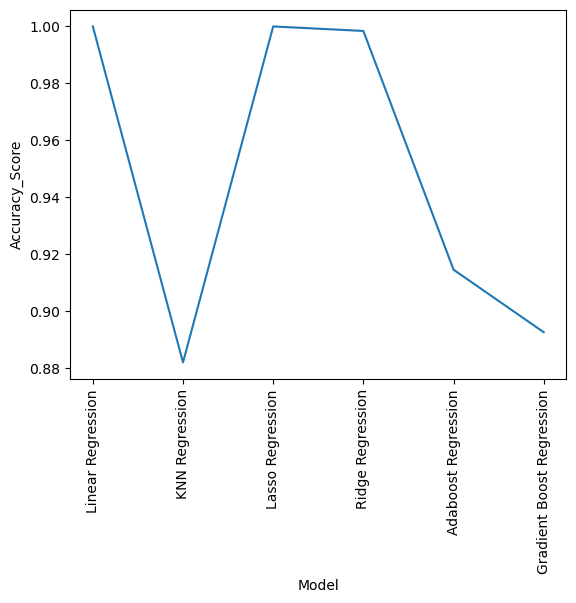

In [39]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_Score'],data = Acc_scores)
plt.xticks(rotation = 90)